# CNN - Resultado por capas
# REDES NEURONALES <a class="tocSkip">
## Deep Learning <a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfd
from tensorflow.keras import (datasets, layers, models)
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load dataset
(train, validation), metadata = tfd.load(
    'cats_vs_dogs',
    split=["train[:80%]","train[80%:]"],
    as_supervised = True,
    with_info = True,
)

In [ ]:
#show one image
category_to_label = metadata.features['label'].int2str
for image, label in train.take(1):
  plt.imshow(image)
  plt.title(category_to_label(label))

In [8]:
# pre process
width, height = 150, 150

def preprocess(image, label):
  img = tf.cast(image, tf.float32)
  img = img / 255
  img = tf.image.resize(img, (width, height))
  return img, label

# apply pre process
train = train.map(preprocess)
validation  = validation.map(preprocess)

#create dataset - shuffle
train_dataset = train.shuffle(100).batch(64)
validation_dataset = validation.shuffle(100).batch(64)

NameError: name 'train' is not defined

In [9]:
print(validation_dataset)
print(train_dataset)

<BatchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


# Create Model with 4 conv layer

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [11]:
epochs = 10
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=epochs, 
                    validation_data=validation_dataset)

Epoch 1/10


C:\Users\ASUS\anaconda3\lib\site-packages\keras\backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


 32/291 [==>...........................] - ETA: 4:22 - loss: 0.6961 - accuracy: 0.5098

KeyboardInterrupt: 

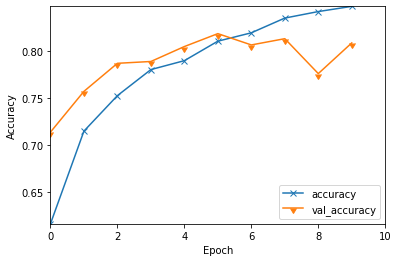

(1.0, 10.0, 0.3434464633464813, 0.6425119042396545)

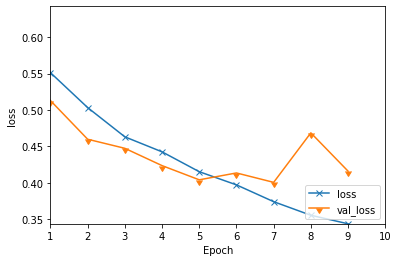

In [8]:
#plot accuracy and loss plot for train and validation dataset
plt.plot(history.history['accuracy'], label='accuracy', marker="x")
plt.plot(history.history['val_accuracy'], label = 'val_accuracy', marker=11)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.axis([0, epochs, min(history.history['accuracy']),max(history.history['accuracy'])])
plt.legend(loc='lower right')
plt.show()


plt.plot(history.history['loss'], label='loss', marker="x")
plt.plot(history.history['val_loss'], label = 'val_loss', marker=11)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.axis([1, epochs, min(history.history['loss']),max(history.history['loss'])])

In [9]:
model.save("cat_vs_dog.h5")

In [9]:
import keras.utils as image

model_l = tf.keras.models.load_model('cat_vs_dog.h5')

#load image of a dog
rocky = image.load_img('rocky.jpeg', target_size=(width,height))
rocky_as_tensor = image.img_to_array(rocky)
rocky_as_tensor = np.expand_dims(rocky_as_tensor, axis=0)
rocky_as_tensor /= 255
print("dog shape", rocky_as_tensor.shape)

#get layer for catch the output
layer_outputs = [layer.output for layer in model_l.layers[:8]]
activation_model = models.Model(inputs=model_l.input, outputs=layer_outputs)
#fed the model with the image
activations = activation_model.predict(rocky_as_tensor)

dog shape (1, 150, 150, 3)
1/1 [==============================] - 0s 265ms/step


In [10]:
#take only the conv layers ( we filter out the max pool layers)
conv_indixes = []
for i in range(len(activations)):
    if( "conv2d" in model_l.layers[i].name) :
        conv_indixes.append(i)
        print("Layer: ", model_l.layers[i].name, " Shape: ", activations[i].shape)

Layer:  conv2d  Shape:  (1, 148, 148, 32)
Layer:  conv2d_1  Shape:  (1, 72, 72, 64)
Layer:  conv2d_2  Shape:  (1, 34, 34, 128)
Layer:  conv2d_3  Shape:  (1, 15, 15, 128)


In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid
#https://matplotlib.org/stable/gallery/axes_grid1/simple_axesgrid.html

def plot_layer(name, activation):
    print("Processing {} layer...".format(name))
    how_many_features_map = activation.shape[3]

    figure_size = how_many_features_map * 2
    fig = plt.figure(figsize=(figure_size, figure_size),)

    grid = ImageGrid(fig, 111,
                     nrows_ncols=(how_many_features_map // 16, 16),
                     axes_pad=0.1,  # pad between axes in inch.
                     )
    images = [activation[0, :, :, i] for i in range(how_many_features_map)]

    for ax, img in zip(grid, images):
        # Iterating over the grid returns the Axes.
        ax.matshow(img)
    plt.show()

#for each conv2d layer plot the feature maps
for i, conv_ix in enumerate(conv_indixes):
    plot_layer(model_l.layers[conv_ix].name, activations[conv_ix])

Processing conv2d layer...
